## **Análise Exploratória - Application Crédito - Pod Bank**

#### **Importar bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(r'/home/jean/projetos/pod-bank/global/')
from util import *

import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

/home/jean/projetos/pod-bank/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importar dados

In [3]:
application_00 = pd.read_csv('../data/raw/application_train.csv')
application_00.shape

(215257, 172)

In [4]:
application_00.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      247330       0         Cash loans           F            N   
1      425716       1         Cash loans           F            Y   
2      331625       0         Cash loans           M            Y   
3      455397       0    Revolving loans           F            N   
4      449114       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             0          157500.0    706410.0      67072.5   
1               Y             1          121500.0    545040.0      25407.0   
2               Y             1          225000.0    942300.0      27679.5   
3               Y             2          144000.0    180000.0       9000.0   
4               Y             0          112500.0    729792.0      37390.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         679500.0   Unaccompanied  Commercial associate   
1         450000.0   Unaccompanied               Working   
2         675000.0   Unaccompanied               Working   
3         180000.0   Unaccompanied  Commercial associate   
4         630000.0   Unaccompanied             Pensioner   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
0               Higher education            Married    House / apartment   
1  Secondary / secondary special            Married    House / apartment   
2  Secondary / secondary special            Married  Municipal apartment   
3  Secondary / secondary special          Separated    House / apartment   
4  Secondary / secondary special     Civil marriage    House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.032561      -14653          -2062            -8599.0   
1                    0.007114      -13995          -2246             -348.0   
2                    0.022625      -21687          -1335            -6306.0   
3                    0.006629      -13071          -2292             -742.0   
4                    0.046220      -19666         365243             -169.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2087          NaN           1               1                0   
1             -172         12.0           1               1                1   
2            -4026          1.0           1               1                0   
3            -1201          NaN           1               1                1   
4            -3112          NaN           1               0                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  \
0                 1           1           0  Private service staff   
1                 1           1           0            Secretaries   
2                 1           0           0               Laborers   
3                 1           1           0          Cooking staff   
4                 1           0           0                    NaN   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     1                            1   
1              3.0                     2                            2   
2              3.0                     2                            2   
3              3.0                     2                            2   
4              2.0                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       13   
1                     MONDAY                       10   
2                   THURSDAY                       10   
3                     MONDAY                        8   
4                     FRIDAY                       10   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                   

In [5]:
for col in application_00.columns:
  if 'var_' in col:
    application_00 = application_00.drop(labels=col, axis='columns')

application_00.shape

(215257, 122)

### Metadados

In [6]:
metadados = generate_metadata(df=application_00, targets=['TARGET', 'SK_ID_CURR'], orderby='PC_NULOS')
metadados

FEATURE  USO_FEATURE  QT_NULOS  PC_NULOS  \
0                  COMMONAREA_AVG  Explicativa    150377     69.86   
1                 COMMONAREA_MODE  Explicativa    150377     69.86   
2                 COMMONAREA_MEDI  Explicativa    150377     69.86   
3        NONLIVINGAPARTMENTS_MEDI  Explicativa    149407     69.41   
4        NONLIVINGAPARTMENTS_MODE  Explicativa    149407     69.41   
5         NONLIVINGAPARTMENTS_AVG  Explicativa    149407     69.41   
6              FONDKAPREMONT_MODE  Explicativa    147183     68.38   
7            LIVINGAPARTMENTS_AVG  Explicativa    147079     68.33   
8           LIVINGAPARTMENTS_MEDI  Explicativa    147079     68.33   
9           LIVINGAPARTMENTS_MODE  Explicativa    147079     68.33   
10                 FLOORSMIN_MODE  Explicativa    145996     67.82   
11                  FLOORSMIN_AVG  Explicativa    145996     67.82   
12                 FLOORSMIN_MEDI  Explicativa    145996     67.82   
13                YEARS_BUILD_AVG  Explicativa    143139     66.50   
14               YEARS_BUILD_MODE  Explicativa    143139     66.50   
15               YEARS_BUILD_MEDI  Explicativa    143139     66.50   
16                    OWN_CAR_AGE  Explicativa    141836     65.89   
17                  LANDAREA_MEDI  Explicativa    127807     59.37   
18                   LANDAREA_AVG  Explicativa    127807     59.37   
19                  LANDAREA_MODE  Explicativa    127807     59.37   
20              BASEMENTAREA_MODE  Explicativa    125984     58.53   
21              BASEMENTAREA_MEDI  Explicativa    125984     58.53   
22               BASEMENTAREA_AVG  Explicativa    125984     58.53   
23                   EXT_SOURCE_1  Explicativa    121249     56.33   
24             NONLIVINGAREA_MODE  Explicativa    118888     55.23   
25              NONLIVINGAREA_AVG  Explicativa    118888     55.23   
26             NONLIVINGAREA_MEDI  Explicativa    118888     55.23   
27                  ELEVATORS_AVG  Explicativa    114721     53.29   
28                 ELEVATORS_MEDI  Explicativa    114721     53.29   
29                 ELEVATORS_MODE  Explicativa    114721     53.29   
30             WALLSMATERIAL_MODE  Explicativa    109480     50.86   
31                 APARTMENTS_AVG  Explicativa    109300     50.78   
32                APARTMENTS_MEDI  Explicativa    109300     50.78   
33                APARTMENTS_MODE  Explicativa    109300     50.78   
34                 ENTRANCES_MODE  Explicativa    108418     50.37   
35                 ENTRANCES_MEDI  Explicativa    108418     50.37   
36                  ENTRANCES_AVG  Explicativa    108418     50.37   
37                 LIVINGAREA_AVG  Explicativa    108084     50.21   
38                LIVINGAREA_MEDI  Explicativa    108084     50.21   
39                LIVINGAREA_MODE  Explicativa    108084     50.21   
40                 HOUSETYPE_MODE  Explicativa    108041     50.19   
41                 FLOORSMAX_MODE  Explicativa    107182     49.79   
42                  FLOORSMAX_AVG  Explicativa    107182     49.79   
43                 FLOORSMAX_MEDI  Explicativa    107182     49.79   
44   YEARS_BEGINEXPLUATATION_MODE  Explicativa    104989     48.77   
45   YEARS_BEGINEXPLUATATION_MEDI  Explicativa    104989     48.77   
46    YEARS_BEGINEXPLUATATION_AVG  Explicativa    104989     48.77   
47                 TOTALAREA_MODE  Explicativa    103905     48.27   
48            EMERGENCYSTATE_MODE  Explicativa    102057     47.41   
49                OCCUPATION_TYPE  Explicativa     67409     31.32   
50                   EXT_SOURCE_3  Explicativa     42837     19.90   
51     AMT_REQ_CREDIT_BUREAU_HOUR  Explicativa     29150     13.54   
52     AMT_REQ_CREDIT_BUREAU_WEEK  Explicativa     29150     13.54   
53      AMT_REQ_CREDIT_BUREAU_MON  Explicativa     29150     13.54   
54     AMT_REQ_CREDIT_BUREAU_YEAR  Explicativa     29150     13.54   
55      AMT_REQ_CREDIT_BUREAU_DAY  Explicativa     29150     13.54   
56      AMT_REQ_CREDIT_BUREAU_QRT  E

## Entendimento do target

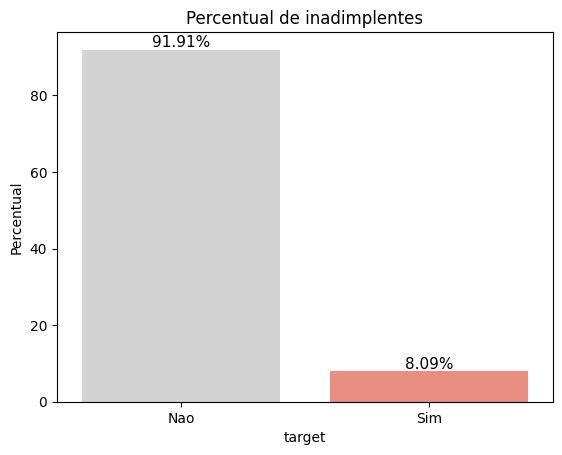

In [7]:
### Entendimento da variável resposta
target_counts = application_00['TARGET'].value_counts()

# Calculando percentuais de churn
percent_n = (target_counts[0] / len(application_00)) * 100
percent_s = (target_counts[1] / len(application_00)) * 100

# Criando dataframe
total_por_target = pd.DataFrame({'target': ['Nao', 'Sim'], 'Percentual': [percent_n, percent_s]})

#Definição de cores
cores = {'Nao': 'lightgrey', 'Sim': 'salmon'}

# Plot do gráfico
ax = sns.barplot(x='target', y='Percentual', hue='target', data=total_por_target, palette=cores, dodge=False)

# Adicionando valores de cada barra
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('target')
plt.ylabel('Percentual')
plt.title('Percentual de inadimplentes')
plt.show()

### Análises univariadas e bivariadas

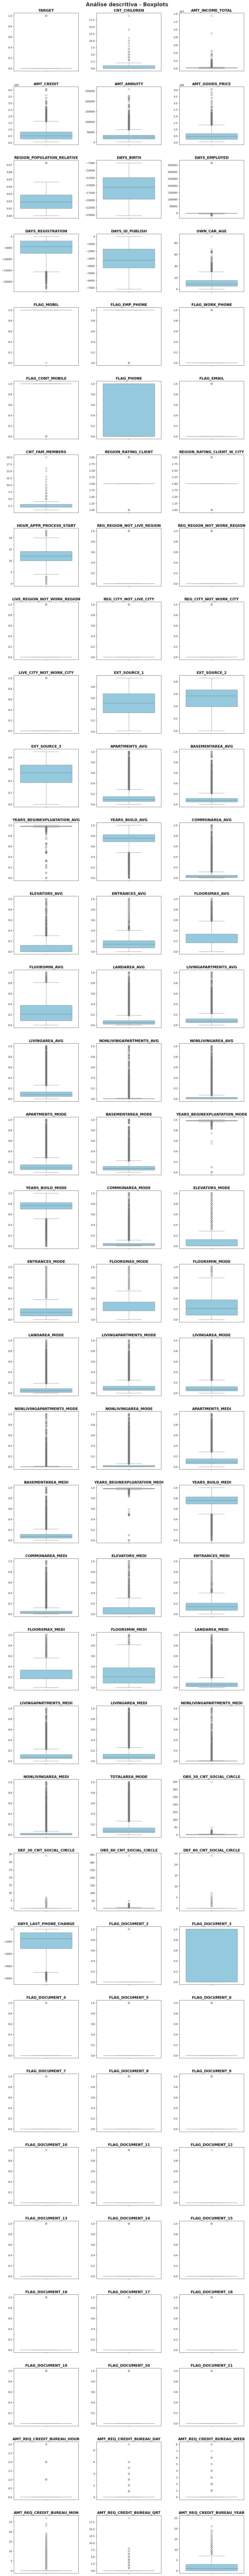

In [8]:
import math
# Variáveis de interesse
target = 'TARGET'
application_01 = application_00.copy()
application_01 = application_01.drop(columns=['SK_ID_CURR'])

boxplots_var_num(application_01)


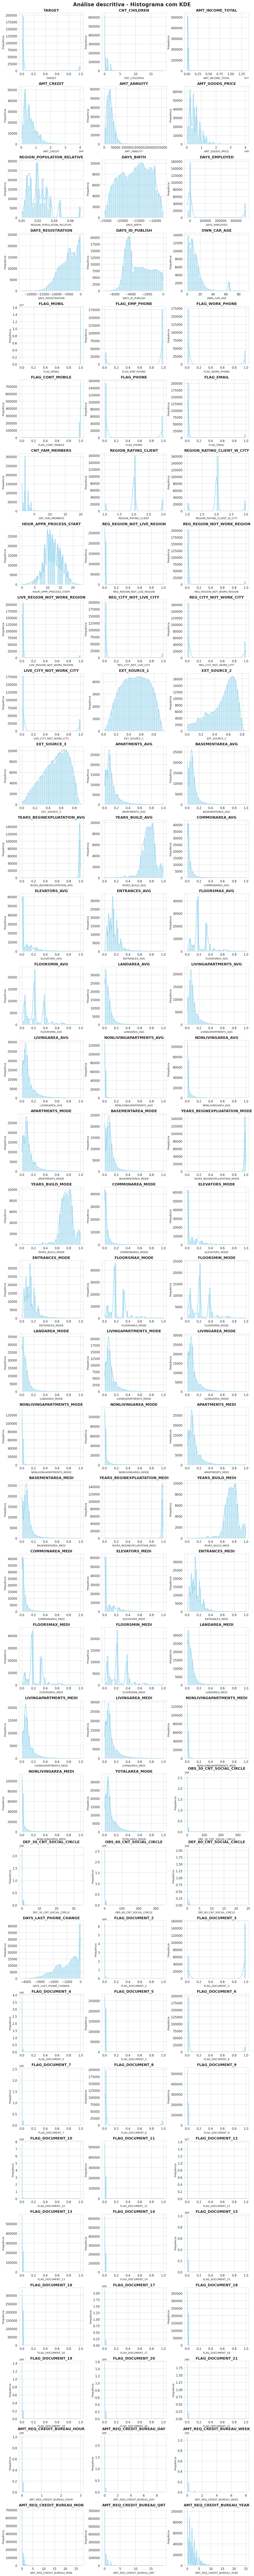

In [9]:
histograms_var_num(application_01)

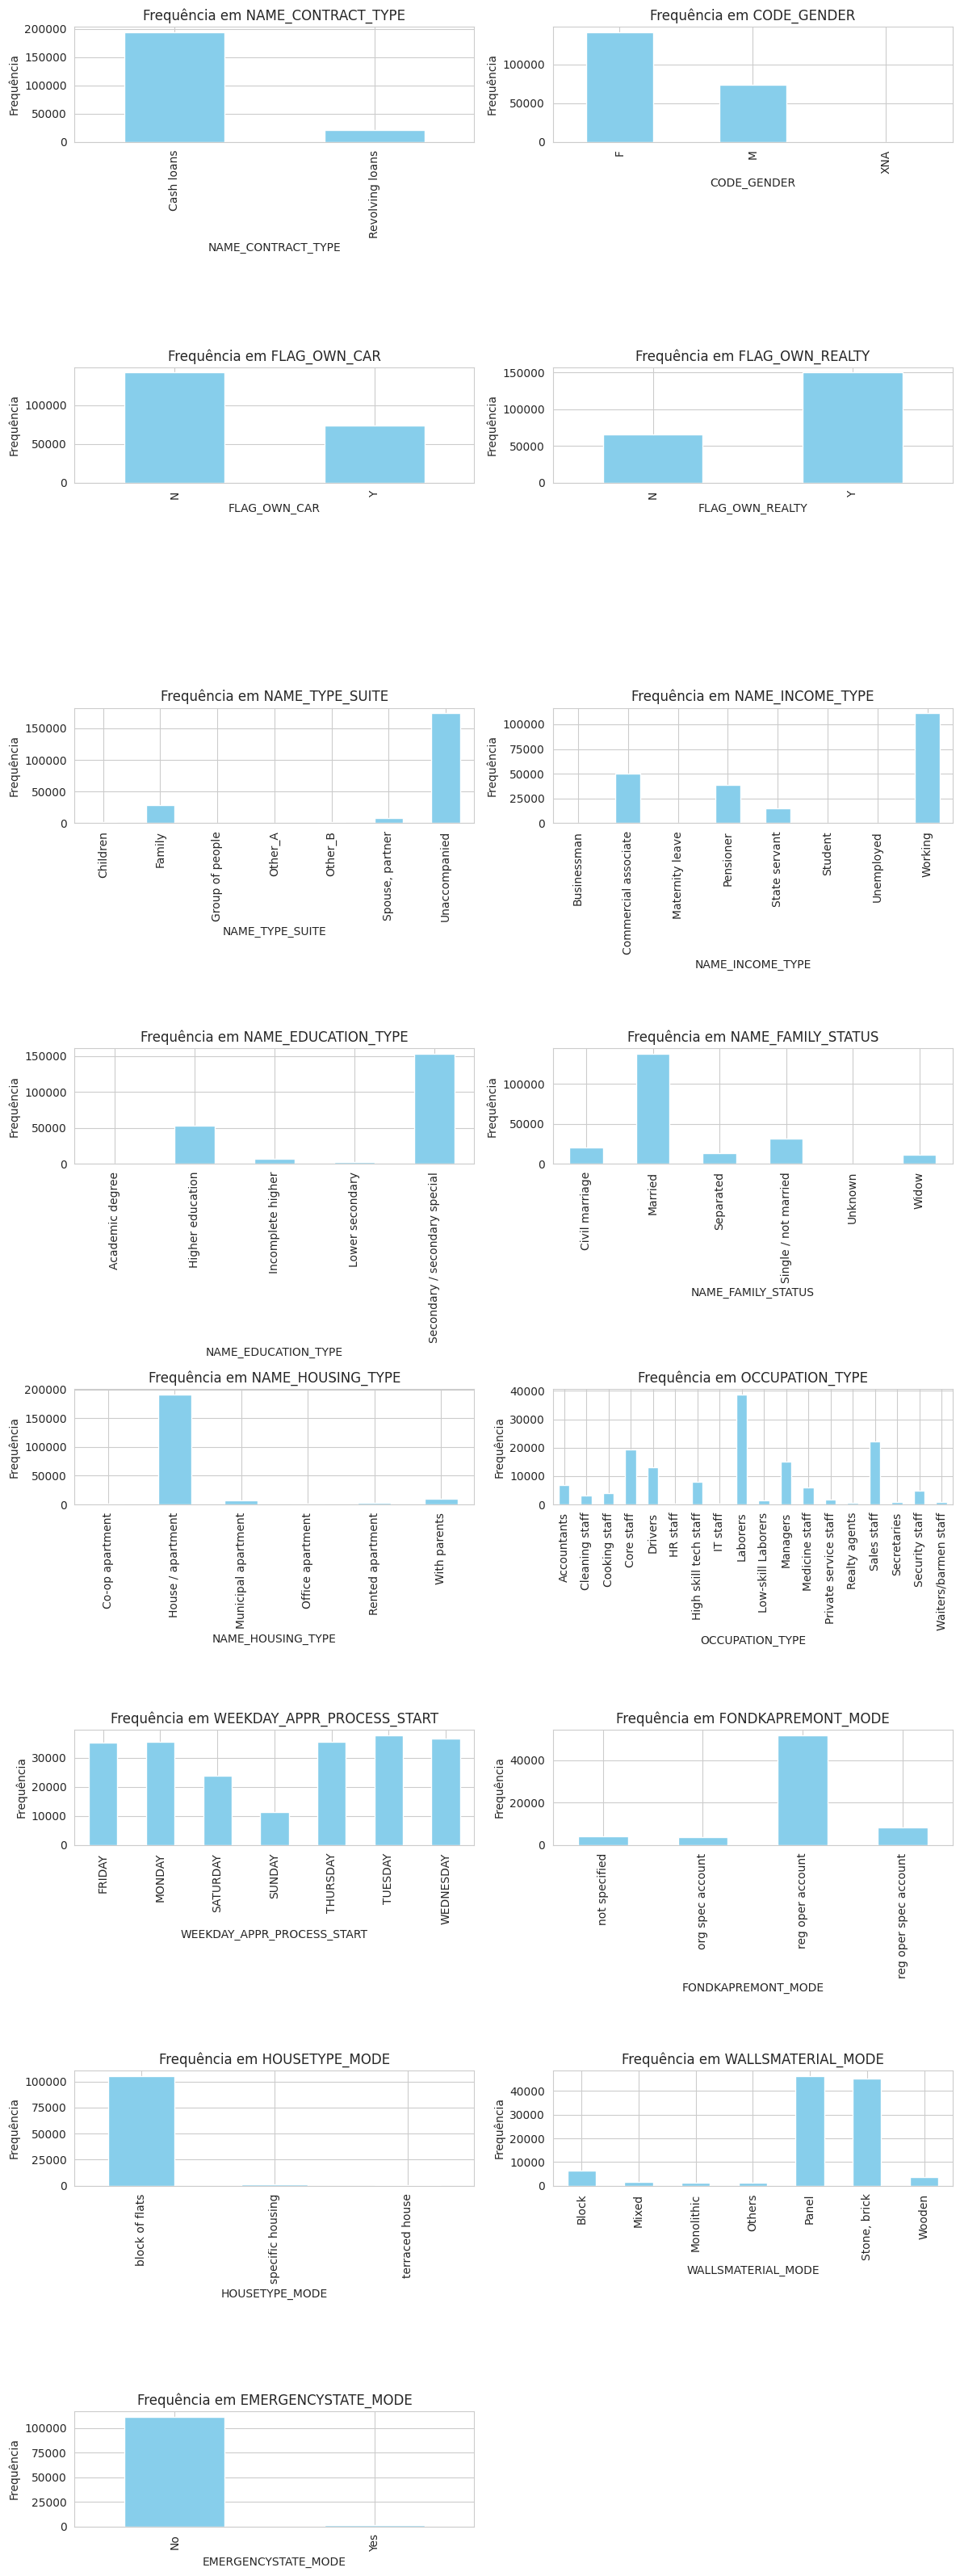

In [10]:
plot_categorical_frequency_pt(application_01, corte_cardinalidade=30, graficos_por_linha=2)

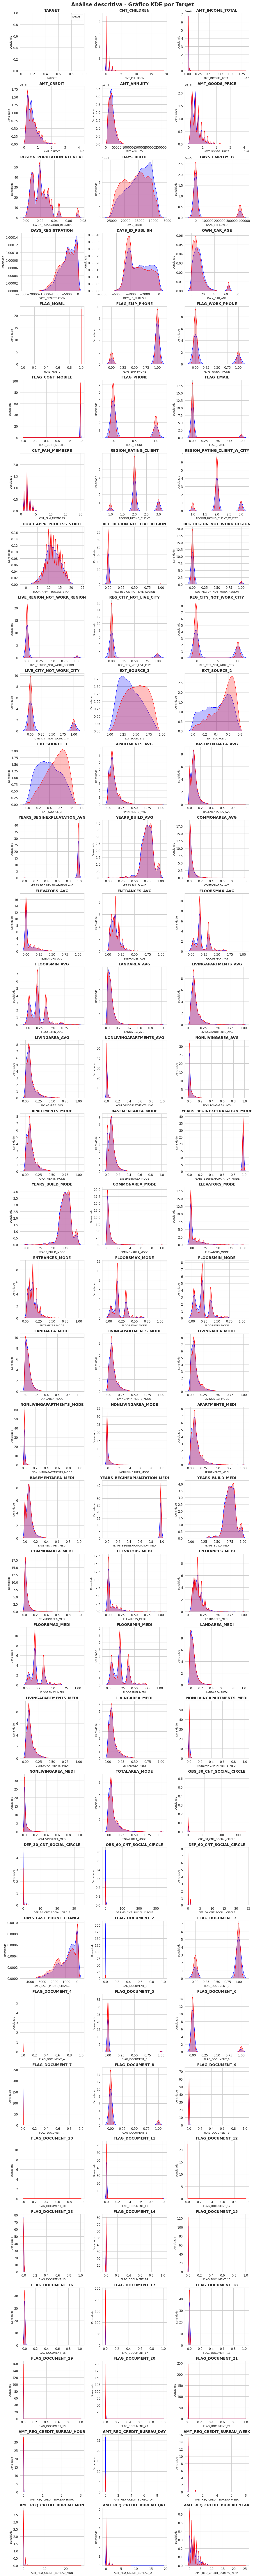

In [11]:
kdeplots_var_num_target(application_01, 'TARGET')
plt.show()

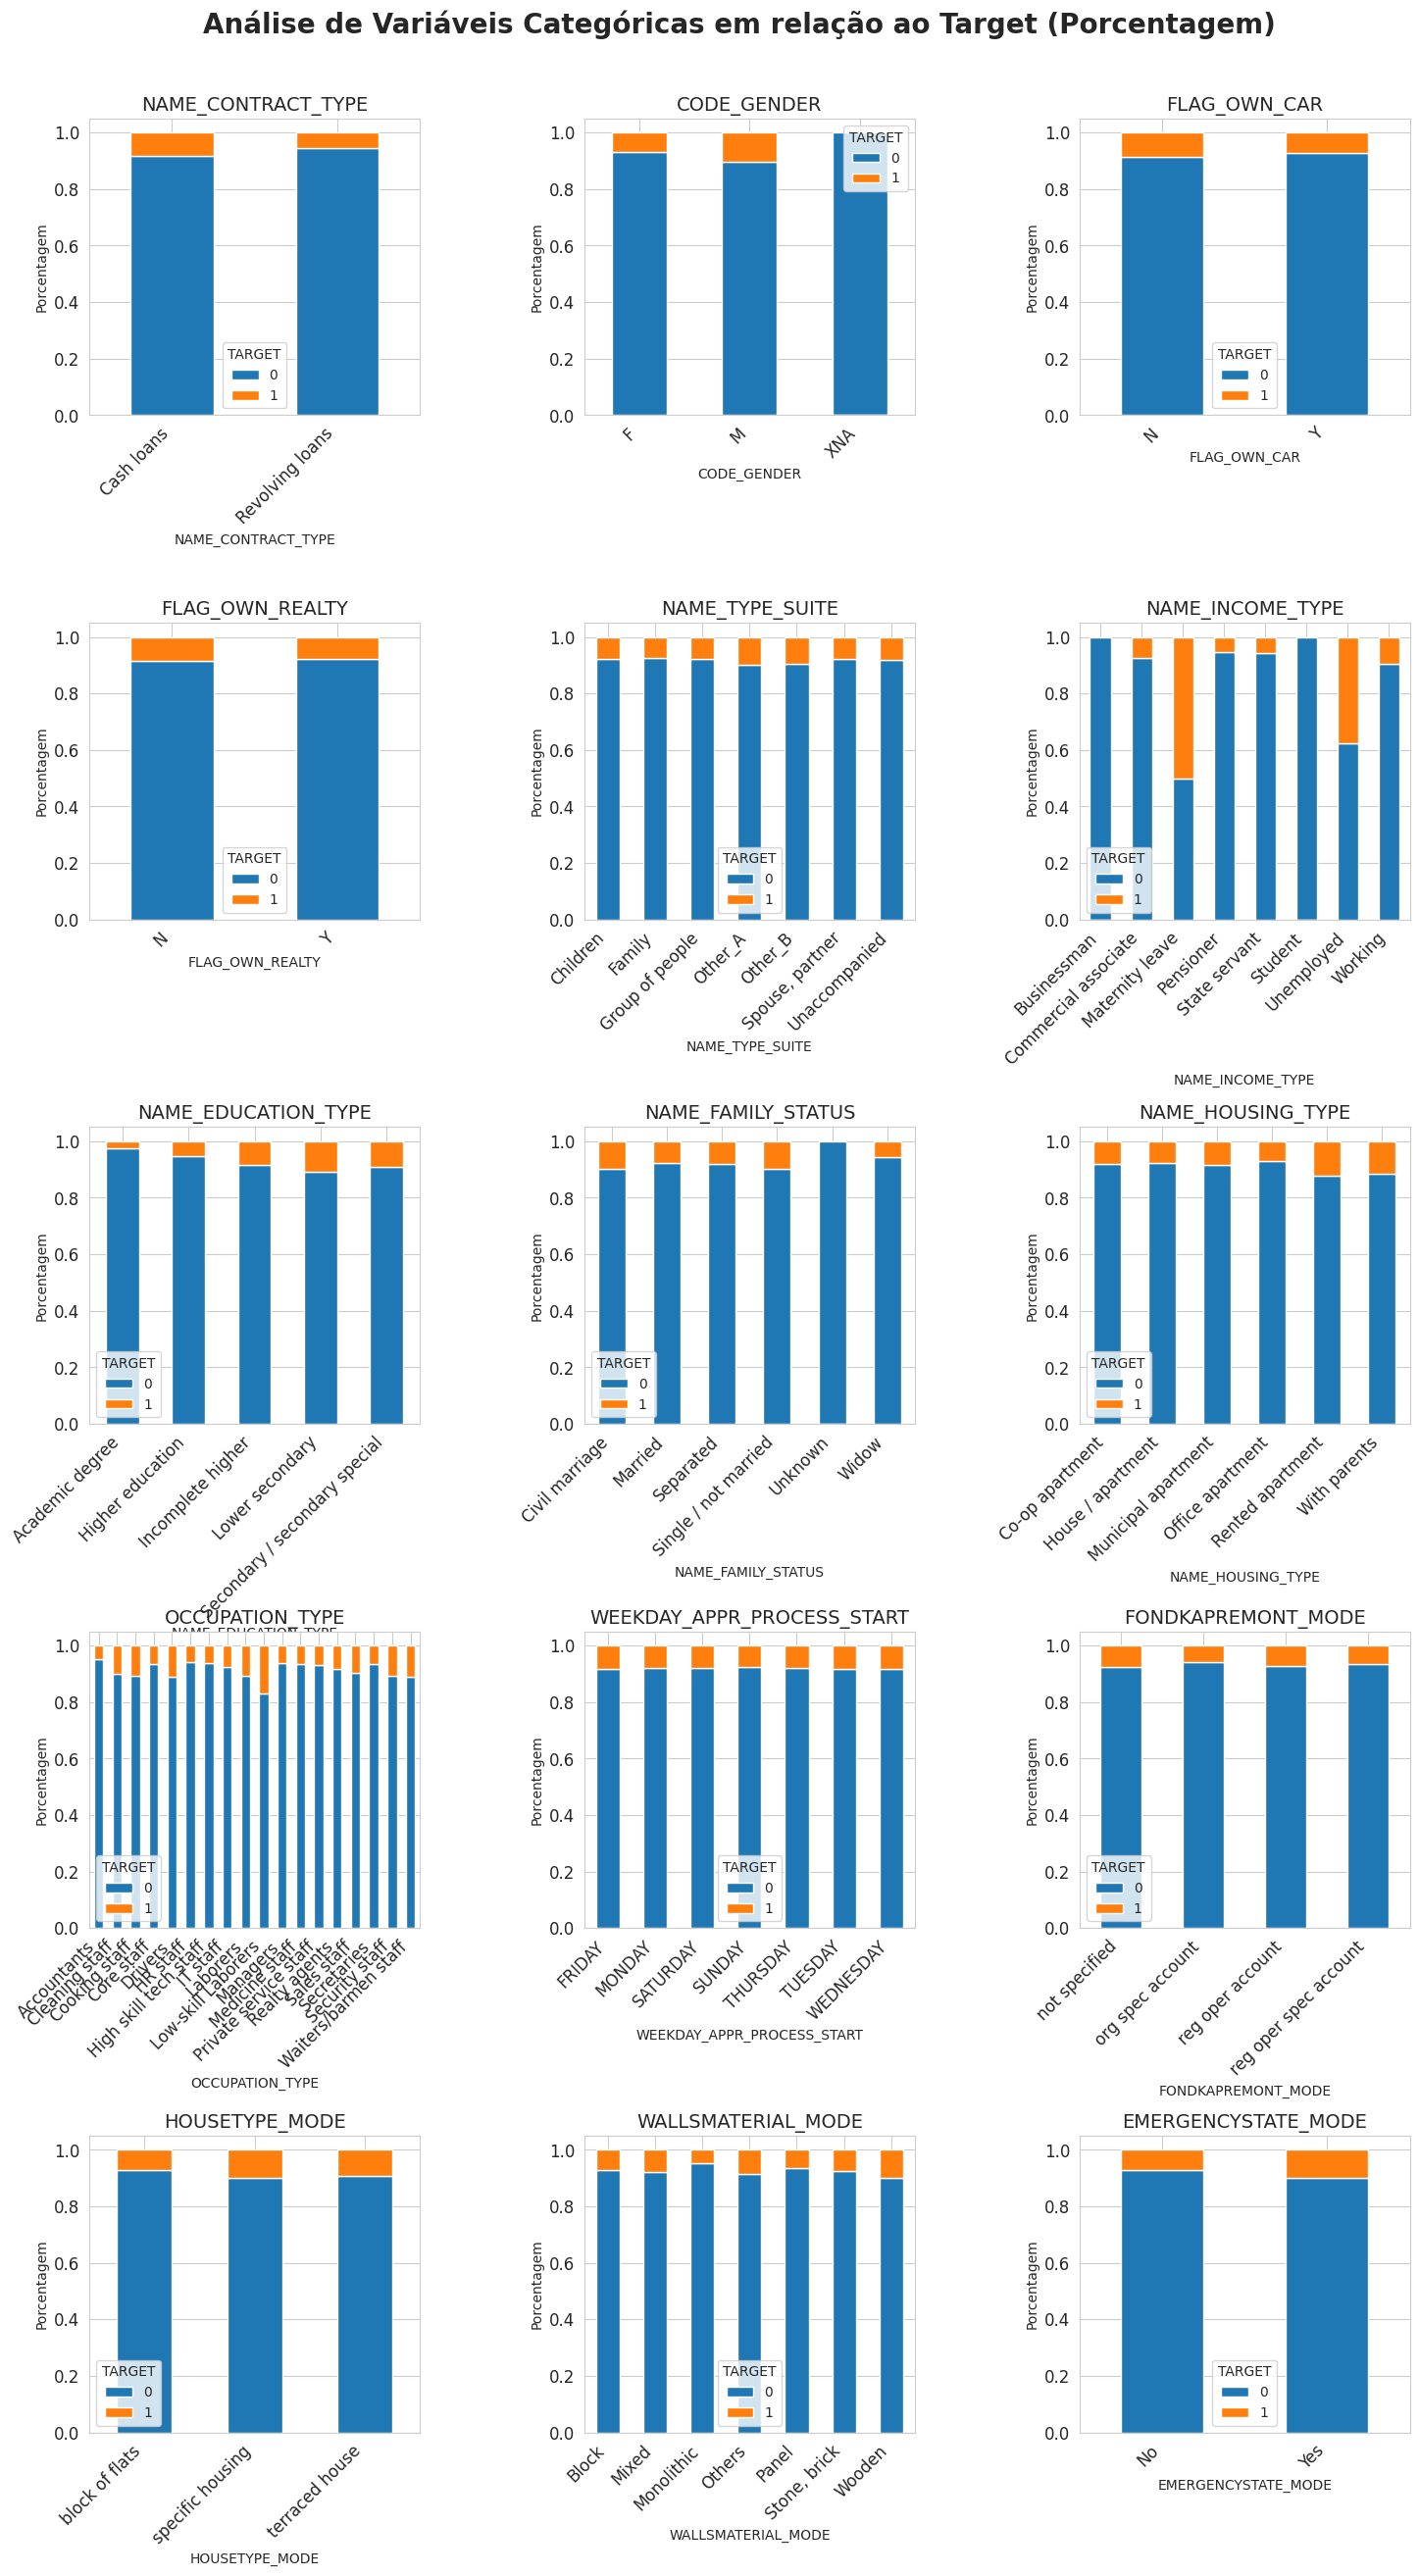

In [41]:
# Exemplo de uso
plot_cat_vs_target_percentage(application_01, 'TARGET', cutoff=20)
plt.show()

## Análise do público

### Quantidade de inadimplentes vs adimplentes

In [13]:
pod_count_categorias(application_01, ['NAME_CONTRACT_TYPE'])

NAME_CONTRACT_TYPE   Count  Percentage
0         Cash loans  194663   90.432831
1    Revolving loans   20594    9.567169
2              Total  215257  100.000000

In [14]:
pod_count_categorias(application_01[application_01['NAME_CONTRACT_TYPE'] == 'Revolving loans'], ['TARGET'])

TARGET  Count  Percentage
0      0  19474   94.561523
1      1   1120    5.438477
2  Total  20594  100.000000

In [15]:
pod_count_categorias(application_01[application_01['NAME_CONTRACT_TYPE'] == 'Cash loans'], ['TARGET'])

TARGET   Count  Percentage
0      0  178371   91.630664
1      1   16292    8.369336
2  Total  194663  100.000000

### Renda

In [16]:
application_01['AMT_INCOME_TOTAL'].describe().round(2)

count      215257.00
mean       168556.85
std        105855.72
min         25650.00
25%        112500.00
50%        144000.00
75%        202500.00
max      13500000.00
Name: AMT_INCOME_TOTAL, dtype: float64

### Idade

In [17]:
application_01['IDADE_ANOS'] = (-1)*application_01['DAYS_BIRTH']/360
application_01['IDADE_ANOS'].describe().round(2)

count    215257.00
mean         44.54
std          12.12
min          20.80
25%          34.47
50%          43.75
75%          54.67
max          70.08
Name: IDADE_ANOS, dtype: float64

### Nível escolar

In [18]:
pod_count_categorias(application_01, ['NAME_EDUCATION_TYPE'])

NAME_EDUCATION_TYPE   Count  Percentage
0  Secondary / secondary special  152634   70.907799
1               Higher education   52664   24.465639
2              Incomplete higher    7169    3.330438
3                Lower secondary    2673    1.241771
4                Academic degree     117    0.054354
5                          Total  215257  100.000000

### Valor do empréstimo

In [19]:
application_01['AMT_CREDIT'].describe().round(2)

count     215257.00
mean      599496.00
std       402898.91
min        45000.00
25%       270000.00
50%       514867.50
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

### Ocupação

In [20]:
pod_count_categorias(application_01, ['OCCUPATION_TYPE'])

OCCUPATION_TYPE   Count  Percentage
0                Laborers   38710   26.182295
1             Sales staff   22344   15.112819
2              Core staff   19317   13.065446
3                Managers   14976   10.129322
4                 Drivers   13030    8.813105
5   High skill tech staff    8055    5.448163
6             Accountants    6861    4.640577
7          Medicine staff    5983    4.046724
8          Security staff    4738    3.204643
9           Cooking staff    4090    2.766355
10         Cleaning staff    3272    2.213084
11  Private service staff    1862    1.259402
12     Low-skill Laborers    1461    0.988177
13   Waiters/barmen staff     935    0.632406
14            Secretaries     929    0.628348
15          Realty agents     527    0.356447
16               HR staff     398    0.269195
17               IT staff     360    0.243493
18                  Total  147848  100.000000

In [49]:
resultado = (
    application_01.groupby('OCCUPATION_TYPE')['TARGET']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'TARGET': 'BAD RATE (%)'})
    .sort_values(by='BAD RATE (%)', ascending=False)  # Ordena do maior para o menor
)
print(resultado)

          OCCUPATION_TYPE  BAD RATE (%)
9      Low-skill Laborers         17.11
17   Waiters/barmen staff         11.23
4                 Drivers         11.11
16         Security staff         10.68
8                Laborers         10.66
2           Cooking staff         10.56
1          Cleaning staff         10.09
14            Sales staff          9.65
13          Realty agents          8.16
7                IT staff          7.50
12  Private service staff          6.77
11         Medicine staff          6.60
15            Secretaries          6.57
3              Core staff          6.43
10               Managers          6.30
6   High skill tech staff          6.05
5                HR staff          5.78
0             Accountants          4.78


### Membros na família

In [21]:
application_01['CNT_FAM_MEMBERS'].describe().round(2)

count    215256.00
mean          2.15
std           0.91
min           1.00
25%           2.00
50%           2.00
75%           3.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [22]:
pod_count_categorias(application_01, ['CNT_FAM_MEMBERS'])

CNT_FAM_MEMBERS   Count  Percentage
0              2.0  110958   51.546995
1              1.0   47338   21.991489
2              3.0   36873   17.129836
3              4.0   17346    8.058312
4              5.0    2389    1.109841
5              6.0     273    0.126826
6              7.0      53    0.024622
7              8.0      13    0.006039
8              9.0       4    0.001858
9             10.0       2    0.000929
10            12.0       2    0.000929
11            11.0       1    0.000465
12            13.0       1    0.000465
13            15.0       1    0.000465
14            16.0       1    0.000465
15            20.0       1    0.000465
16           Total  215256  100.000000